In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488493 sha256=5072c97edfa48d935aa0876d93b482f25d494e115112033ef0a4a3260a6bb98b
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Creating a SparkSession
spark = SparkSession.builder \
    .appName("Twitch Streamers EDA") \
    .getOrCreate()

# Loading data from a CSV file
data_path = "/kaggle/input/top-1000-twitch-streamers-data-may-2024"
df = spark.read.option("header", "true").csv(data_path)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/06/25 12:22:55 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
# Checking the Data Schema

print("Data Schema:")
df.printSchema()

Data Schema:
root
 |-- RANK: string (nullable = true)
 |-- NAME: string (nullable = true)
 |-- LANGUAGE: string (nullable = true)
 |-- TYPE: string (nullable = true)
 |-- MOST_STREAMED_GAME: string (nullable = true)
 |-- 2ND_MOST_STREAMED_GAME: string (nullable = true)
 |-- AVERAGE_STREAM_DURATION: string (nullable = true)
 |-- FOLLOWERS_GAINED_PER_STREAM: string (nullable = true)
 |-- AVG_VIEWERS_PER_STREAM: string (nullable = true)
 |-- AVG_GAMES_PER_STREAM: string (nullable = true)
 |-- TOTAL_TIME_STREAMED: string (nullable = true)
 |-- TOTAL_FOLLOWERS: string (nullable = true)
 |-- TOTAL_VIEWS: string (nullable = true)
 |-- TOTAL_GAMES_STREAMED: string (nullable = true)
 |-- ACTIVE_DAYS_PER_WEEK: string (nullable = true)
 |-- MOST_ACTIVE_DAY: string (nullable = true)
 |-- DAY_WITH_MOST_FOLLOWERS_GAINED: string (nullable = true)



In [4]:
# Printing the first 5 lines of data

print("The first 5 lines of data:")
df.show(5, truncate=False)

The first 5 lines of data:
+----+--------+--------+-----------+------------------------------+----------------------+-----------------------+---------------------------+----------------------+--------------------+-------------------+---------------+-----------+--------------------+--------------------+---------------+------------------------------+
|RANK|NAME    |LANGUAGE|TYPE       |MOST_STREAMED_GAME            |2ND_MOST_STREAMED_GAME|AVERAGE_STREAM_DURATION|FOLLOWERS_GAINED_PER_STREAM|AVG_VIEWERS_PER_STREAM|AVG_GAMES_PER_STREAM|TOTAL_TIME_STREAMED|TOTAL_FOLLOWERS|TOTAL_VIEWS|TOTAL_GAMES_STREAMED|ACTIVE_DAYS_PER_WEEK|MOST_ACTIVE_DAY|DAY_WITH_MOST_FOLLOWERS_GAINED|
+----+--------+--------+-----------+------------------------------+----------------------+-----------------------+---------------------------+----------------------+--------------------+-------------------+---------------+-----------+--------------------+--------------------+---------------+------------------------------+
|

In [5]:
# Data type conversion for numeric columns

numeric_columns = ['RANK', 'AVERAGE_STREAM_DURATION', 'FOLLOWERS_GAINED_PER_STREAM',
                   'AVG_VIEWERS_PER_STREAM', 'AVG_GAMES_PER_STREAM',
                   'TOTAL_TIME_STREAMED', 'TOTAL_FOLLOWERS', 'TOTAL_VIEWS',
                   'TOTAL_GAMES_STREAMED']

for column in numeric_columns:
    df = df.withColumn(column, col(column).cast("float"))

In [6]:
# Plots and data visualization

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


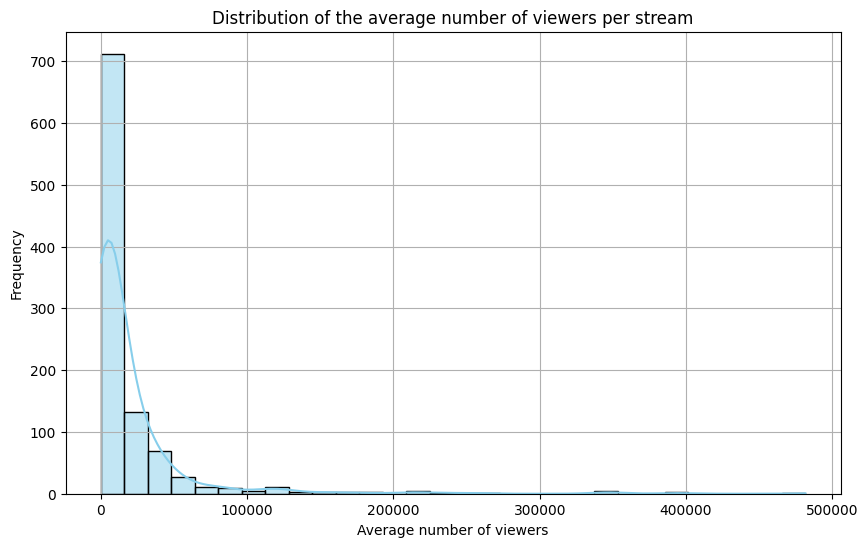

In [7]:
# Distribution of the average number of viewers per stream

plt.figure(figsize=(10, 6))
sns.histplot(df.toPandas(), x='AVG_VIEWERS_PER_STREAM', bins=30, kde=True, color='skyblue')
plt.title('Distribution of the average number of viewers per stream')
plt.xlabel('Average number of viewers')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

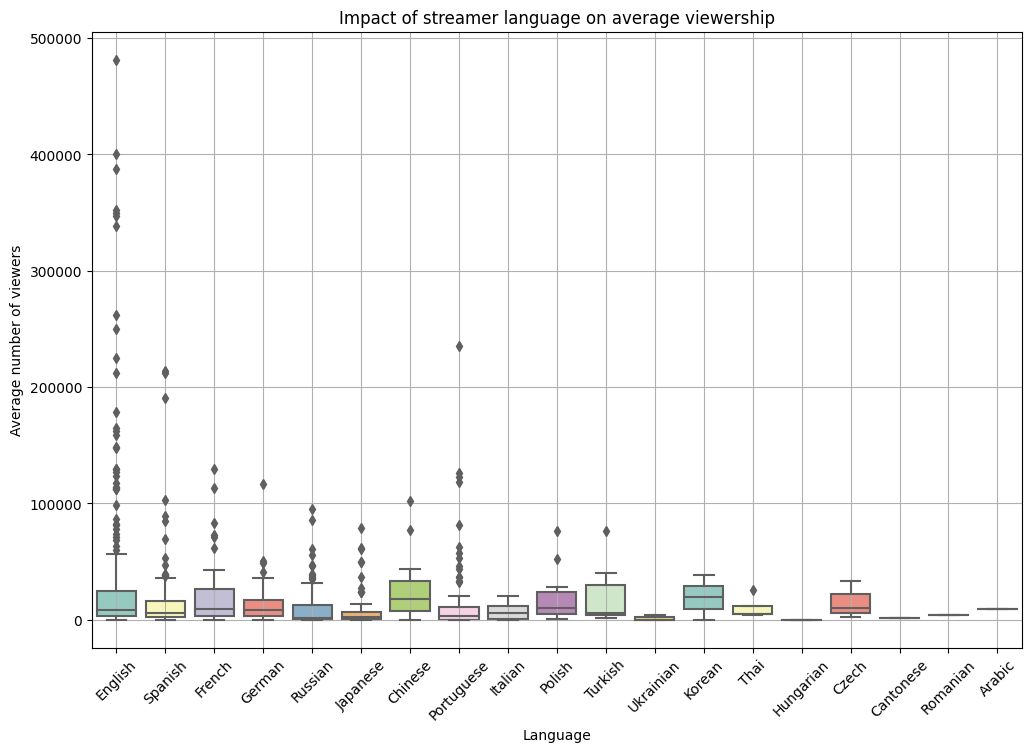

In [8]:
# Impact of streamer language on average viewership

plt.figure(figsize=(12, 8))
sns.boxplot(x='LANGUAGE', y='AVG_VIEWERS_PER_STREAM', data=df.toPandas(), palette='Set3')
plt.title('Impact of streamer language on average viewership')
plt.xlabel('Language')
plt.ylabel('Average number of viewers')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

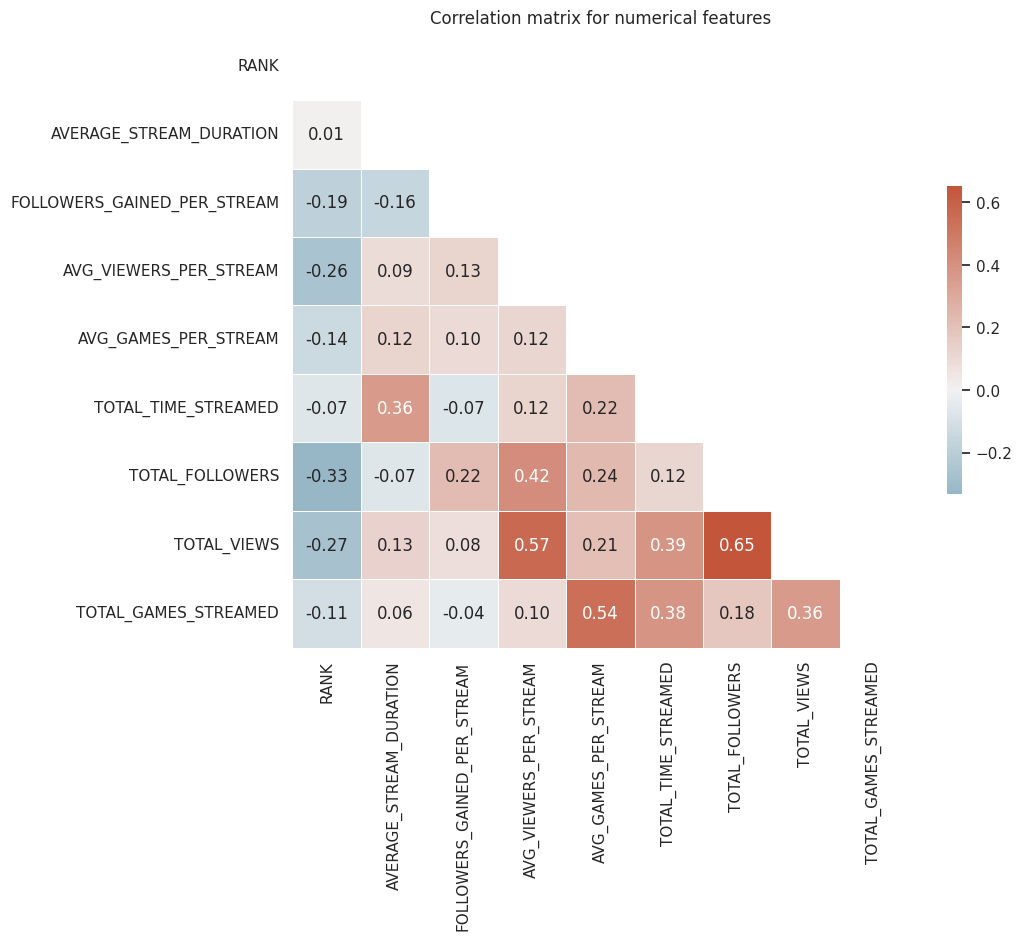

In [9]:
# Correlation matrix for numerical features

numeric_data = df.select(numeric_columns)
sns.set_theme(style="white")
plt.figure(figsize=(10, 8))
corr = numeric_data.toPandas().corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt=".2f", center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation matrix for numerical features')
plt.show()

In [10]:
# Categorical Data Analysis

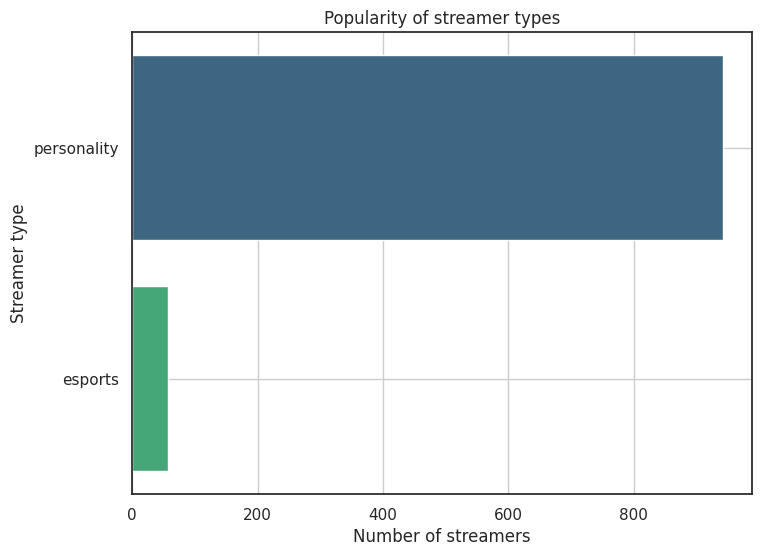

In [11]:
# Popularity of streamer types

plt.figure(figsize=(8, 6))
streamer_types = df.groupBy('TYPE').count().orderBy('count', ascending=False).toPandas()
sns.barplot(x='count', y='TYPE', data=streamer_types, palette='viridis')
plt.title('Popularity of streamer types')
plt.xlabel('Number of streamers')
plt.ylabel('Streamer type')
plt.grid(True)
plt.show()

In [12]:
spark.stop()